In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!unzip /gdrive/MyDrive/dataset/ADReSS-IS2020-data.zip > /dev/null

In [ ]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Load and preprocess the data
def load_audio_data(file_path):
    y, sr = librosa.load(file_path)
    return y, sr

def preprocess_audio_data(audio_data, sr):
    spectrogram = librosa.stft(audio_data)
    spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram))
    spectrogram_db = librosa.util.normalize(spectrogram_db, axis=1)
    return spectrogram_db

X_train = []
y_train = []
X_test = []
y_test = []


In [ ]:

for folder in ['/content/ADReSS-IS2020-data/train/cc', '/content/ADReSS-IS2020-data/train/cd']:
    for file_name in os.listdir(folder):
        if file_name.endswith('.wav'):
            file_path = os.path.join(folder, file_name)
            y, sr = load_audio_data(file_path)
            spectrogram_db = preprocess_audio_data(y, sr)
            if folder == 'train/cc':
                X_train.append(spectrogram_db)
                y_train.append(0)
            else:
                X_train.append(spectrogram_db)
                y_train.append(1)

In [ ]:
for folder in ['/content/ADReSS-IS2020-data/test/cc', '/content/ADReSS-IS2020-data/test/cd']:
    for file_name in os.listdir(folder):
        if file_name.endswith('.wav'):
            file_path = os.path.join(folder, file_name)
            y, sr = load_audio_data(file_path)
            spectrogram_db = preprocess_audio_data(y, sr)
            if folder == 'test/cc':
                X_test.append(spectrogram_db)
                y_test.append(0)
            else:
                X_test.append(spectrogram_db)
                y_test.append(1)

In [ ]:
import os
# from pydub import AudioSegment
from scipy.io import wavfile
from tempfile import mktemp
from IPython.display import Audio

import librosa
import librosa.display

import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as mpimg
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from PIL import Image 
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D 
from tensorflow.keras.layers import GlobalAveragePooling2D, Lambda
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image

K.clear_session()

In [ ]:
def create_spectogram(audio_file_name, source_path, save_path):
    x, sr = librosa.load(source_path + audio_file_name)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, y_axis='hz')
    plt.ylabel('')
    plt.axis('off')
    file_name = audio_file_name.replace('.wav', '')
    plt.savefig(save_path + file_name + '.jpg', bbox_inches='tight', pad_inches=0)
    

In [ ]:
CC_TRAIN = '/content/ADReSS-IS2020-data/train/cc/' 
for sound in os.listdir(CC_TRAIN): 
  create_spectogram(sound,CC_TRAIN,'/content/img_dataset/train/cc/')

In [ ]:
CD_TRAIN = '/content/ADReSS-IS2020-data/train/cd/' 
for sound in os.listdir(CD_TRAIN): 
  create_spectogram(sound,CD_TRAIN,'/gdrive/MyDrive/img_dataset/train/cd/')

In [ ]:
CC_TEST = '/content/ADReSS-IS2020-data/test/cc/' 
for sound in os.listdir(CC_TEST): 
  create_spectogram(sound,CC_TEST,'/gdrive/MyDrive/img_dataset/test/cc/')

In [ ]:
CD_TEST = '/content/ADReSS-IS2020-data/test/cd/' 
for sound in os.listdir(CD_TEST): 
  create_spectogram(sound,CD_TEST,'/gdrive/MyDrive/img_dataset/test/cd/' )

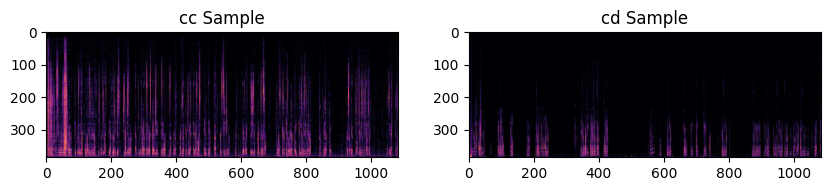

In [ ]:
# Take a peek at image data 
sample_cc = '/gdrive/MyDrive/img_dataset/test/cc/S174.jpg' 
sample_cc = plt.imread(sample_cc)
sample_cd = '/gdrive/MyDrive/img_dataset/test/cd/S192.jpg'
sample_cd = plt.imread(sample_cd)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,2)) 
ax1.imshow(sample_cc)
ax1.set_title('cc Sample')
ax2.imshow(sample_cd)
ax2.set_title('cd Sample')
plt.show()